# COVID-19

These datasets show fat, protein, and food quantitiy (in kilogram) percentage that consumed from every type of food. The datasets also show percentages about Obesity, Undernourished, and COVID-19 case related (Confirmed, Deaths, Recovered, and Active).
(Note: All of the data has unit "%" except population. The unit "%" is calculated based on total population).

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import all of th data
df_food = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
df_protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_category = pd.read_csv('Supply_Food_Data_Descriptions.csv')

these are all the columns that are in dataset, and i divide them to supply and non supply columns.

In [92]:
all_columns = df_food.columns.tolist()
print(f'All Columns : {all_columns} \n\n')

supply_columns = df_food[df_category["Categories"]].columns.tolist()
print(f'Supply Columns : {supply_columns} \n\n')

non_food = df_food.drop(df_category["Categories"], axis = 1)
non_supply_columns = non_food.columns.tolist()
print(f'Non Supply Columns : {non_supply_columns} \n\n')

All Columns : ['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'] 


Supply Columns : ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products'] 


Non Supply Columns : ['Country', 'Obesity', 'Unde

In [93]:
df_food["Undernourished"].replace("<2.5", "2.5", inplace = True)
df_food["Undernourished"] = df_food.Undernourished.astype(float)

I try to merge all of the datasets based on Country, to make it different, i add suffixes to the end of column name, like _food, _protein, and _fat. You can see the result below.

In [94]:
df_non_supply_new = df_food[non_supply_columns]
df_food_new = df_food[['Country']+supply_columns]
df_protein_new = df_protein[['Country']+supply_columns]
df_fat_new = df_fat[['Country']+supply_columns]
dfmin1 = pd.merge(df_food_new, df_protein_new, on = "Country", suffixes = ("_food", "_protein"))
dfmin2 = pd.merge(dfmin1, df_fat_new, on = "Country", suffixes = ("", "_fat"))
df = pd.merge(dfmin2, df_non_supply_new, on = "Country")         
df

,Country,Alcoholic Beverages_food,Animal fats_food,Animal Products_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.3593,28.3684,4.5,29.8,0.081402,0.001895,0.033132,0.046375,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.6503,17.9998,22.3,6.2,0.084045,0.001924,0.048425,0.033695,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.5145,35.5857,26.6,3.9,0.030579,0.002067,0.021589,0.006923,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.1231,34.7010,6.8,25.0,0.000850,0.000035,0.000258,0.000557,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.2469,22.2995,19.1,NaN,0.071134,0.003093,0.022680,0.045361,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,0.1851,33.6855,25.2,21.2,0.018576,0.000154,0.005783,0.012639,28516000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,0.6373,16.7548,2.1,9.3,0.000371,0.000000,0.000345,0.000026,95656000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,0.1667,37.4535,14.1,38.9,0.003834,0.001036,0.001475,0.001324,29162000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,0.1567,40.3939,6.5,46.7,0.008717,0.000123,0.007340,0.001254,17861000.0,%


I try to sort the data based on Deaths percentage, with descending order.

In [95]:
sorted_df = df.sort_values(by = ["Deaths"], ascending = False, ignore_index = True)
sorted_df

,Country,Alcoholic Beverages_food,Animal fats_food,Animal Products_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.2370,...,0.2982,23.2622,24.5,2.5,0.534954,0.084936,0.147853,0.302164,11458000.0,%
1,United Kingdom,5.2632,0.2754,18.8798,0.0006,6.5412,0.6210,1.0911,4.9551,4.4181,...,0.2127,24.1332,29.5,2.5,0.467793,0.065288,0.002041,0.400464,66833000.0,%
2,Spain,5.3152,0.2357,18.3382,0.0011,6.0548,0.7321,2.2646,4.8332,5.3456,...,0.2611,30.4731,27.1,2.5,0.528477,0.060211,0.319453,0.148814,47073000.0,%
3,Italy,3.1892,0.2834,19.0329,0.0005,8.5417,0.6247,1.5816,6.0207,4.2963,...,0.2277,28.1306,22.9,2.5,0.398227,0.057566,0.313018,0.027643,60345000.0,%
4,Sweden,4.4232,1.0442,24.0627,0.0000,6.1923,0.7266,1.7659,3.5405,4.1476,...,0.2296,21.5852,22.1,2.5,0.633259,0.051332,0.000000,0.581927,10286000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,New Caledonia,5.0363,0.0821,11.7818,0.0804,8.5840,0.7494,2.0361,5.5855,5.8687,...,0.1887,27.7282,NaN,7.1,NaN,NaN,NaN,NaN,291000.0,%
166,Samoa,1.4236,0.2262,11.1630,0.1236,3.6768,0.1314,2.7788,10.7845,5.7993,...,0.0431,28.3194,45.5,2.7,NaN,NaN,NaN,NaN,199000.0,%
167,Solomon Islands,0.8298,0.1038,3.8504,0.0121,9.0233,0.0826,2.2840,3.2798,0.8897,...,0.0785,36.3351,20.5,8.9,NaN,NaN,NaN,NaN,699000.0,%
168,Turkmenistan,0.5038,0.3373,16.0611,0.0000,14.8029,0.5139,0.2137,4.1441,4.3767,...,0.4459,17.3085,17.5,5.4,NaN,NaN,NaN,NaN,5942000.0,%


We can see that a lot of countries have null values at non supply columns, so it was put in the low rank. Belgium is in the first rank, and i want to know where Indonesia is.

In [96]:
ranking = sorted_df[sorted_df["Country"] == "Indonesia"].index.values.astype(int)[0]
print("Rank of Deaths, Indonesia:", ranking+1)

Rank of Deaths, Indonesia: 90


In [97]:
death_percent = (df.loc[ranking, "Deaths"])
death = death_percent*(df.loc[ranking, "Population"])

print(f'Percentage of Deaths in Indonesia is {round(death_percent, 10)}% from total of population.')
print(f'Total of deaths: {round(death)} people.')

Percentage of Deaths in Indonesia is 0.0006886773% from total of population.
Total of deaths: 3400.0 people.


I make a new column named Confirmed Category and split values in the Confirmed column into 5 categories, those are very low, low, moderate, high, very high. I apply them for dataset food and group columns Alcoholic Beverages, Vegetables, Fruits (Excluding Wine), Fish, Seafood, Meat, and Milk (Excluding Butter) with mean of each column.

In [98]:
label = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df_food["Confirmed Category"] = pd.qcut(df_fat["Confirmed"], 5, labels = label)

cols = ['Alcoholic Beverages','Vegetables', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Meat','Milk - Excluding Butter']

# Code here
groupby_confirmed = df_food.groupby("Confirmed Category").mean().loc[:,cols]
groupby_confirmed

,Alcoholic Beverages,Vegetables,Fruits - Excluding Wine,"Fish, Seafood",Meat,Milk - Excluding Butter
Confirmed Category,,,,,,
Very Low,3.052979,4.716552,4.636100,1.406736,2.540297,3.136758
Low,2.612509,6.820787,6.311419,1.602838,3.781025,5.626419
Moderate,2.512413,6.337541,5.960209,1.150187,2.718209,6.551634
High,3.757944,6.305681,5.066816,0.821237,3.731747,9.499078
Very High,3.586087,6.430966,6.181384,1.586263,3.974331,8.973219


In [99]:
df = groupby_confirmed

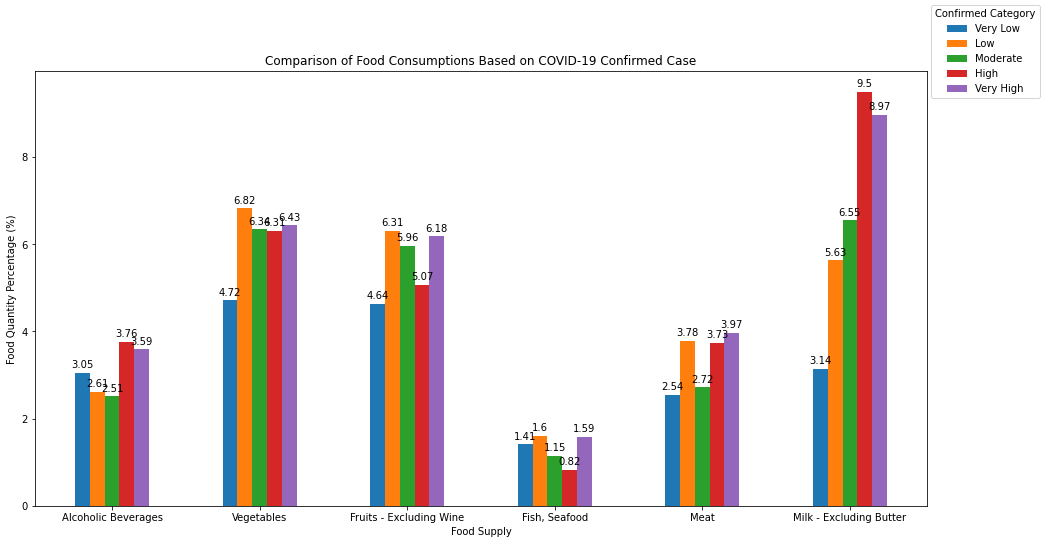

In [100]:
figur, axes = plt.subplots(figsize = (16,8))

x = np.arange(0, 11, 2)
i = 0

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
for row in df.iterrows():
    barr = axes.bar(x + i, row[1], width = 0.2, label = row[0])
    i = i+ 0.2
    autolabel(barr)
plt.xticks(x+0.4, df.columns)
figur.legend(title = "Confirmed Category")
axes.set_title("Comparison of Food Consumptions Based on COVID-19 Confirmed Case")
axes.set_xlabel("Food Supply")
axes.set_ylabel("Food Quantity Percentage (%)")
plt.show()

There is no certain pattern between quantity of food supply and confirmed case of COVID 19

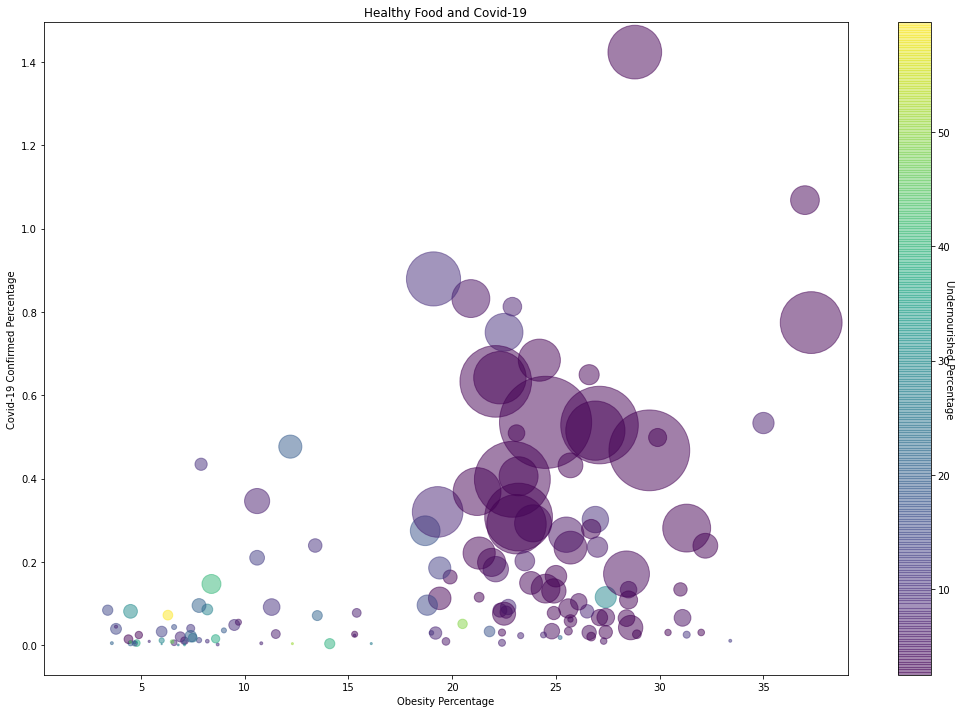

In [116]:
figur, axes = plt.subplots(figsize=(18, 12))
lala = axes.scatter(df_food['Obesity'], df_food['Confirmed'], 
                    c= df_food['Undernourished'], s=df_food["Deaths"]*100000, cmap = "viridis", 
                    alpha = 0.5)
nana = figur.colorbar(lala)
axes.set_title("Healthy Food and Covid-19")
axes.set_ylabel("Covid-19 Confirmed Percentage")
axes.set_xlabel("Obesity Percentage")
nana.set_label("Undernourished Percentage", rotation = 270)
plt.show()

1. Most of the countries have low undernourished percentage, there is only one high in undernourished percentage but low in COVID-19 case confirmed.
2. There is 1 country who have a high in COVID-19 case confirmed, death percentage and obesity percentage. It could be related in that country.
3. It looks like the plots have 2 big clusters, the first cluster, higher obesity percentage have higher COVID-19 case confirmed and death percentage. The second cluster, lower obesity percentage have lower COVID-19 case confirmed and death percentage.